In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import load_data_local

## Set Preferences

In [2]:
SH = ['B3', 'B4', 'B5', 'B6']
RASA2 = ['E3', 'E4', 'E5', 'E6']
CUL5 = ['B7', 'B8', 'B9', 'B10']

In [3]:
colors = {'Safe Harbor KO': '#a9a9a9', 
          'RASA2 KO': '#800000',
          'CUL5 KO': '#000075'}

In [4]:
data_dir = '/gladstone/engelhardt/lab/MarsonLabIncucyteData/AnalysisFiles/CarnevaleRepStim/updated_full'

In [5]:
conditions = ['Safe Harbor KO', 'RASA2 KO', 'CUL5 KO']

## Get cancer cell counts over time

In [6]:
n_cells = np.zeros((3,4,350))

In [7]:
def get_cells_over_time(dcl_ob):
    tcells = dcl_ob['y'][1,:,:,0,:]
    ncells = [len(np.unique(tcells[i])) - 1 for i in range(len(tcells))]
    return ncells

In [8]:
for i in range(4):
    sh_ob = load_data_local(data_dir + '/cart_' + SH[i] + '_start_0_end_350_nuc_15_cyto_75.zip')
    n_cells[0,i] = get_cells_over_time(sh_ob)
    
    rasa_ob = load_data_local(data_dir + '/cart_' + RASA2[i] + '_start_0_end_350_nuc_15_cyto_75.zip')
    n_cells[1,i] = get_cells_over_time(rasa_ob)

    cul_ob = load_data_local(data_dir + '/cart_' + CUL5[i] + '_start_0_end_350_nuc_15_cyto_75.zip')
    n_cells[2,i] = get_cells_over_time(cul_ob)

## Get red nuclear fluorescence over time

In [9]:
n_flour = np.zeros((3,4,350))

In [10]:
for i in range(4):
    sh_ob = load_data_local(data_dir + '/cart_' + SH[i] + '_start_0_end_350_nuc_15_cyto_75.zip')
    n_flour[0,i] = np.sum(sh_ob['X'][1], axis = (1,2,3))
    
    rasa_ob = load_data_local(data_dir + '/cart_' + RASA2[i] + '_start_0_end_350_nuc_15_cyto_75.zip')
    n_flour[1,i] = np.sum(rasa_ob['X'][1], axis = (1,2,3))

    cul_ob = load_data_local(data_dir + '/cart_' + CUL5[i] + '_start_0_end_350_nuc_15_cyto_75.zip')
    n_flour[2,i] = np.sum(cul_ob['X'][1], axis = (1,2,3))

In [11]:
lower_lim = 50
upper_lim = 350

In [13]:
import os
os.getcwd()

'/gladstone/engelhardt/lab/adamw/Occident-Paper-Cluster/Figure_3'

## Plot

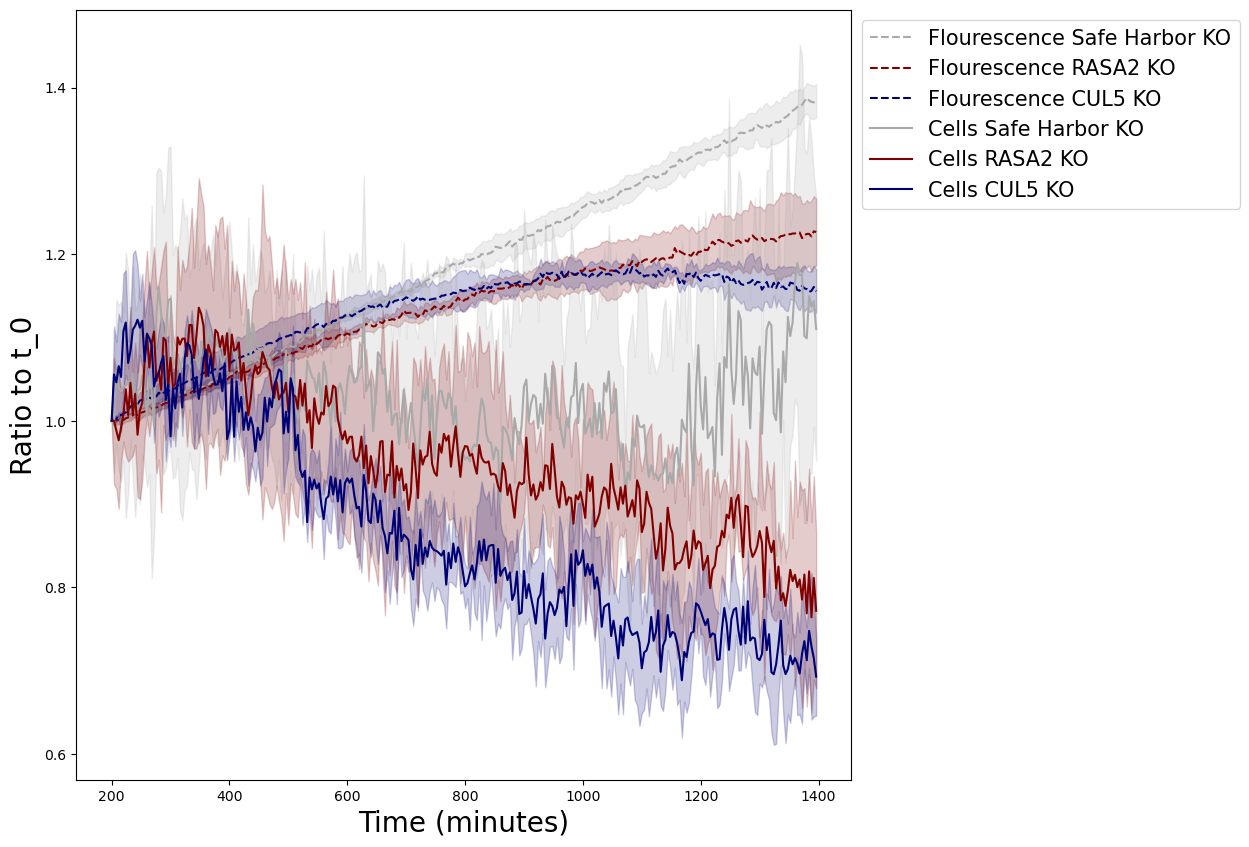

In [14]:
ytest = np.divide(n_flour, n_flour[:,:,[lower_lim]])
fig, ax = plt.subplots(1,1,figsize = (10,10))
for i in range(len(conditions)):
    ax.plot(4 * np.arange(lower_lim, upper_lim), 
             np.mean(ytest[i], axis = 0)[lower_lim:upper_lim], '--', color = colors[conditions[i]], label = 'Flourescence ' + conditions[i])
    ax.fill_between(4 * np.arange(lower_lim, upper_lim), 
                    np.mean(ytest[i], axis = 0)[lower_lim:upper_lim] -  np.std(ytest[i], axis = 0)[lower_lim:upper_lim],
                    np.mean(ytest[i], axis = 0)[lower_lim:upper_lim] + np.std(ytest[i], axis = 0)[lower_lim:upper_lim],
                    color = colors[conditions[i]], alpha = 0.2)
plt.legend(fontsize = 15)
plt.xlabel('Time (minutes)', fontsize = 20)

ytest = np.divide(n_cells, n_cells[:,:,[lower_lim]])
for i in range(len(conditions)):
    ax.plot(4 * np.arange(lower_lim, upper_lim), 
             np.mean(ytest[i], axis = 0)[lower_lim:upper_lim], '-', color = colors[conditions[i]], label = 'Cells ' + conditions[i])
    ax.fill_between(4 * np.arange(lower_lim, upper_lim), 
                    np.mean(ytest[i], axis = 0)[lower_lim:upper_lim] -  np.std(ytest[i], axis = 0)[lower_lim:upper_lim],
                    np.mean(ytest[i], axis = 0)[lower_lim:upper_lim] + np.std(ytest[i], axis = 0)[lower_lim:upper_lim],
                    color = colors[conditions[i]], alpha = 0.2)
plt.legend(fontsize = 15, bbox_to_anchor=(1, 1))
plt.xlabel('Time (minutes)', fontsize = 20)

plt.ylabel('Ratio to t_0', fontsize = 20)
#plt.xlim([50 * 3, 350 * 3])
plt.savefig('./figs/cancer_cell-count-fluor.pdf')
plt.show()

## Fit linear model of cell count vs taime

In [15]:
SH_y = n_cells[0,:,lower_lim:upper_lim] # - n_cells[0,:,[lower_lim]].swapaxes(0,1)
RASA_y = n_cells[1,:,lower_lim:upper_lim] # - n_cells[1,:,[lower_lim]].swapaxes(0,1)
CUL_y = n_cells[2,:,lower_lim:upper_lim] # - n_cells[2,:,[lower_lim]].swapaxes(0,1)

In [16]:
t = np.repeat(4 * np.expand_dims(np.arange(upper_lim - lower_lim), axis = 1), 4 , axis = 1).T

In [17]:
import statsmodels.api as sm

### SH KO

In [18]:
sh_mod = sm.OLS(SH_y.reshape(-1), sm.add_constant(t.reshape(-1)))
sh_res = sh_mod.fit()
print(sh_res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     14.47
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           0.000150
Time:                        10:07:40   Log-Likelihood:                -4808.2
No. Observations:                1200   AIC:                             9620.
Df Residuals:                    1198   BIC:                             9631.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        123.3580      0.767    160.890      0.0

### RASA2 KO

In [19]:
rasa_mod = sm.OLS(RASA_y.reshape(-1), sm.add_constant(t.reshape(-1)))
rasa_res = rasa_mod.fit()
print(rasa_res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     1585.
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          1.83e-221
Time:                        10:07:40   Log-Likelihood:                -4267.4
No. Observations:                1200   AIC:                             8539.
Df Residuals:                    1198   BIC:                             8549.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.8218      0.489    271.884      0.0

### CUL5 KO

In [20]:
cul_mod = sm.OLS(CUL_y.reshape(-1), sm.add_constant(t.reshape(-1)))
cul_res = cul_mod.fit()
print(cul_res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     2108.
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          2.41e-266
Time:                        10:07:40   Log-Likelihood:                -4519.6
No. Observations:                1200   AIC:                             9043.
Df Residuals:                    1198   BIC:                             9053.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        127.0064      0.603    210.696      0.0

In [21]:
[sh_res.params[1], rasa_res.params[1], cul_res.params[1]]

[-0.00422042189357665, -0.02813842376026402, -0.04004837553750599]

## Combine each pair of conditions to compare slopes with interaction test

### SH/RASA2

In [22]:
sh_rasa_y = np.concatenate((SH_y.reshape(-1), RASA_y.reshape(-1)))
sh_rasa_x = np.concatenate([t.reshape(-1), t.reshape(-1)])
sh_rasa_group = np.concatenate((np.zeros(t.reshape(-1).shape), np.ones(t.reshape(-1).shape)))
sh_rasa_int = np.multiply(sh_rasa_x, sh_rasa_group)
X = np.vstack((sh_rasa_x, sh_rasa_group, sh_rasa_int, np.ones((sh_rasa_int.shape)))).T
sh_rasa_mod = sm.OLS(sh_rasa_y, X)
sh_rasa_res = sh_rasa_mod.fit()
print(sh_rasa_res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     349.5
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          3.15e-188
Time:                        10:07:40   Log-Likelihood:                -9193.6
No. Observations:                2400   AIC:                         1.840e+04
Df Residuals:                    2396   BIC:                         1.842e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0042      0.001     -4.537      0.0

In [23]:
sh_rasa_res.pvalues

array([5.98503505e-06, 7.51984169e-25, 2.66430513e-69, 0.00000000e+00])

## SH/CUL5

In [24]:
sh_cul_y = np.concatenate((SH_y.reshape(-1), CUL_y.reshape(-1)))
sh_cul_x = np.concatenate([t.reshape(-1), t.reshape(-1)])
sh_cul_group = np.concatenate((np.zeros(t.reshape(-1).shape), np.ones(t.reshape(-1).shape)))
sh_cul_int = np.multiply(sh_cul_x, sh_cul_group)
X = np.vstack((sh_cul_x, sh_cul_group, sh_cul_int, np.ones((sh_cul_int.shape)))).T
sh_cul_mod = sm.OLS(sh_cul_y, X)
sh_cul_res = sh_cul_mod.fit()
print(sh_cul_res.summary())
print(sh_cul_res.pvalues)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     983.6
Date:                Mon, 03 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:07:40   Log-Likelihood:                -9362.2
No. Observations:                2400   AIC:                         1.873e+04
Df Residuals:                    2396   BIC:                         1.876e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0042      0.001     -4.229      0.0

## RASA2/CUL5

In [25]:
rasa_cul_y = np.concatenate((RASA_y.reshape(-1), CUL_y.reshape(-1)))
rasa_cul_x = np.concatenate([t.reshape(-1), t.reshape(-1)])
rasa_cul_group = np.concatenate((np.zeros(t.reshape(-1).shape), np.ones(t.reshape(-1).shape)))
rasa_cul_int = np.multiply(rasa_cul_x, rasa_cul_group)
X = np.vstack((rasa_cul_x, rasa_cul_group, rasa_cul_int, np.ones((rasa_cul_int.shape)))).T
rasa_cul_mod = sm.OLS(rasa_cul_y, X)
rasa_cul_res = rasa_cul_mod.fit()
print(rasa_cul_res.summary())
print(rasa_cul_res.pvalues)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     1636.
Date:                Mon, 03 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:07:40   Log-Likelihood:                -8813.2
No. Observations:                2400   AIC:                         1.763e+04
Df Residuals:                    2396   BIC:                         1.766e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0281      0.001    -35.444      0.0